In [3]:
import sys
sys.path.append("../../")

import os
import utils
import datetime
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from eval import prepare_full_eval_data, get_eval_task
import utils

In [4]:
start_eval_str = "2021-10-01" # when eval period starts (must follow %Y-%m-%d format)
start_eval_date = datetime.datetime.strptime(start_eval_str, "%Y-%m-%d") 
eval_len = 10 # how many days we running evaluation for

In [5]:
full_eval_data = prepare_full_eval_data(start_eval_date, eval_len)

day_offset = 1 # one day from our starting
prediction_date = start_eval_date + datetime.timedelta(days=day_offset)
eval_data, eval_target = get_eval_task(full_eval_data, prediction_date)

In [6]:
station = "PANC"
latlon = utils.fetch_latlon(station)
station_data = eval_data[station]

# Map Stuff

In [18]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [19]:
stations_lat_lon = dict(zip(utils.stations, [utils.fetch_latlon(station) for station in utils.stations]))
df = pd.DataFrame(stations_lat_lon)
df = df.T.rename(columns={
    0: "Latitude", 
    1: "Longitude",
})

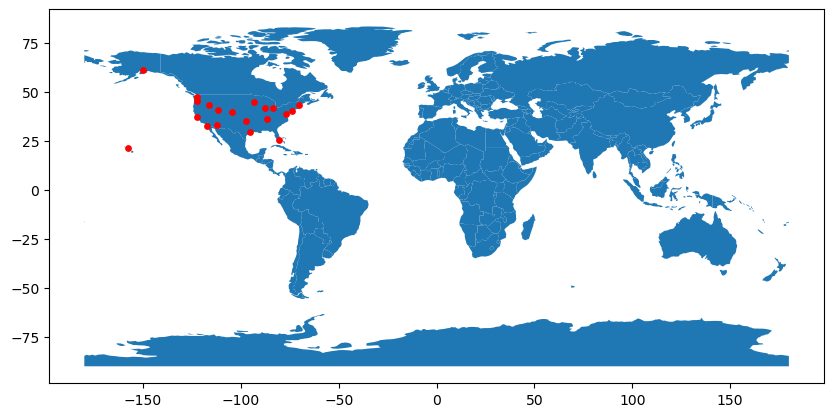

In [20]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

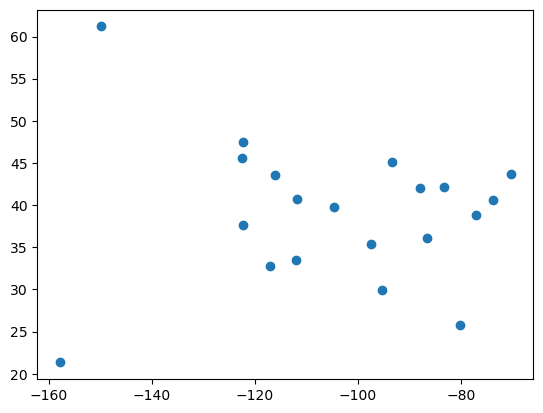

In [25]:
plt.scatter(df["Longitude"].values, df["Latitude"].values)